# Actividad Complementario Prueba 1

Instrucciones:
- Complete este cuadernillo jupyter con sus códigos y respuestas
- Se trabajará en grupos de dos personas
- Se entrega un cuadernillo por grupo
- La entrega es a través de correo electrónico a phuijse@inf.uach.cl
- La fecha de entrega es el Miércoles 16 de Octubre a las 23:59
- Use las librerías `scipy`, `numpy` y `matplotlib`

### Nombre completo integrantes:
-Enzo Marín
-Franco Bocca

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import fftpack
from style import *

Cannot find path /home/gma950/.jupyter/nbconfig/, rise configuration wasn't set


# 2) Pregunta n°4

Sean las funciones constante
$$
\begin{align}
x[n] &= A
\end{align}
$$
y delta de Kronecker
$$
\begin{align}
\delta[n-m] = \begin{cases} 1 & n=m \\ 0 & n \neq m \end{cases}
\end{align}
$$
Encuentre y grafique la DFT de $x[n]$ y de $A \delta [n-n_0]$. Asuma que $n = 0,1,2, \dots ,N-1$ y que $n_0 \in [0,N-1]$, ¿Qué ocurre cuando $n_0 = 0$?                 
HINT: $ \sum_{n=0}^{N-1} x^n = \frac{1-x^N}{1-x}, x \neq 1 $


Consideraciones pregunta 4: Asuman $A=5, N=10$ y muestre resultados para $n_0=0,1,2,3,4,5$

**Respuesta:** 


Sabemos que para la constante
$$
\begin{align}
X[k] &= \sum_{n=0}^{N-1} A e^{-j \frac{2\pi}{N} nk} = A \sum_{n=0}^{N-1} e^{-j \frac{2\pi}{N} n k} \nonumber \\
& = \begin{cases} A N & k = 0 \\ 0  & k\neq 0 \end{cases} \nonumber \\
&= A N \delta[k] \nonumber \\
&= 50 \delta[k]
\end{align}
$$

Y para la delta de Kronecker obtenemos
$$
X[k] = \sum_{n=0}^{N-1} \delta[n-n_0] e^{-j \frac{2\pi}{N} nk} = e^{-j \frac{2\pi}{N} n_0 k} = W_N^{n_0 k}
$$


Si $n_0 = 0$, entonces $X[k] = 5$ (Observable en los gráficos).

Para los demas valores de $n_0$, revisar los gráficos.

<IPython.core.display.Javascript object>


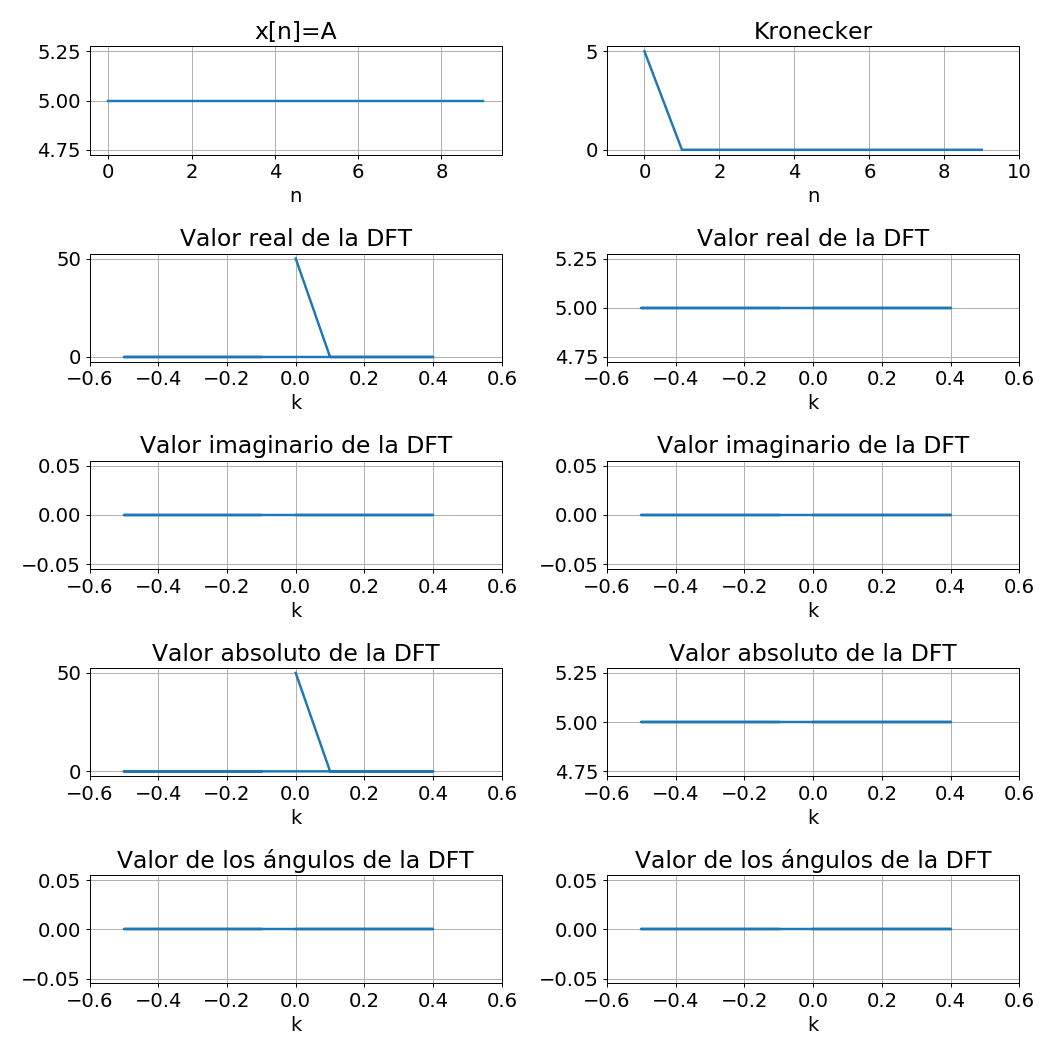

interactive(children=(SelectionSlider(continuous_update=False, description='n_0', layout=Layout(height='20px',…

In [5]:
A = 5
N = 10
n = np.arange(0.0, 10.0, step = 1)

#print(n)

x = n*0 + A

#n_0 = 0 #1 2 3 4 5


def delta(n, m):
    s = np.zeros_like(n)
    for i in range(0, len(n)):
        if n[i]==m:
            s[i]=A
    return s

Akrn = delta(n, n_0)

fig, axes = plt.subplots(5,2,figsize=(12,12)) 

axes[0][0].plot(n,x)
axes[0][0].set_title("x[n]=A")
axes[0][0].set_xlabel('n')
axes[1][0].plot(fftpack.fftfreq(d=1,n=10), np.real(fftpack.fft(x)));
axes[1][0].set_title("Valor real de la DFT")
axes[1][0].set_xlim([-0.6, 0.6])
axes[1][0].set_xlabel('k')
axes[2][0].plot(fftpack.fftfreq(d=1,n=10), np.imag(fftpack.fft(x)));
axes[2][0].set_title("Valor imaginario de la DFT")
axes[2][0].set_xlim([-0.6, 0.6])
axes[2][0].set_xlabel('k')
axes[3][0].plot(fftpack.fftfreq(d=1,n=10), np.abs(fftpack.fft(x)));
axes[3][0].set_title("Valor absoluto de la DFT")
axes[3][0].set_xlim([-0.6, 0.6])
axes[3][0].set_xlabel('k')
axes[4][0].plot(fftpack.fftfreq(d=1,n=10), np.angle(fftpack.fft(x)));
axes[4][0].set_title("Valor de los ángulos de la DFT")
axes[4][0].set_xlim([-0.6, 0.6])
axes[4][0].set_xlabel('k')

def update(n_0): 
    Akrn = delta(n, n_0)
    #print(Akrn)
    axes[0][1].cla()
    axes[0][1].set_title("Kronecker")
    axes[0][1].set_xlabel('n')
    axes[0][1].set_xlim([-1, 10])
    axes[0][1].plot(n,Akrn)
    axes[1][1].cla()
    axes[1][1].set_title("Valor real de la DFT")
    axes[1][1].set_xlim([-0.6, 0.6])
    axes[1][1].set_xlabel('k')
    axes[1][1].plot(fftpack.fftfreq(d=1,n=10), np.real(fftpack.fft(Akrn)))
    axes[2][1].cla()
    axes[2][1].set_title("Valor imaginario de la DFT")
    axes[2][1].set_xlim([-0.6, 0.6])
    axes[2][1].set_xlabel('k')
    axes[2][1].plot(fftpack.fftfreq(d=1,n=10), np.imag(fftpack.fft(Akrn)))
    axes[3][1].cla()
    axes[3][1].set_title("Valor absoluto de la DFT")
    axes[3][1].set_xlim([-0.6, 0.6])
    axes[3][1].set_xlabel('k')
    axes[3][1].plot(fftpack.fftfreq(d=1,n=10), np.abs(fftpack.fft(Akrn)))
    axes[4][1].cla()
    axes[4][1].set_title("Valor de los ángulos de la DFT")
    axes[4][1].set_xlim([-0.6, 0.6])
    axes[4][1].set_xlabel('k')
    axes[4][1].plot(fftpack.fftfreq(d=1,n=10), np.angle(fftpack.fft(Akrn)))

interact(update, n_0=SelectionSlider_nice(options=[0,1, 2, 3, 4, 5]));
